#### Predicting the Number of Installations for the Google Play Store Apps

### 1. Getting Data and Explanatory Data Analysis 

In [2]:
# Import libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 

# for Visualization 
import missingno as mn
from IPython import get_ipython
import matplotlib.pyplot as plt
import seaborn as sns

# For Model 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# For handling Warning Messages
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



In [3]:
# Getting Data 
df=pd.read_csv("Google_Playstore_data.csv")

In [4]:
# Top 5 rows of data
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
# Data size 
df.shape

(2312944, 24)

In [6]:
# Columns Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [7]:
# Stastical summary for numeric features
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


<AxesSubplot:>

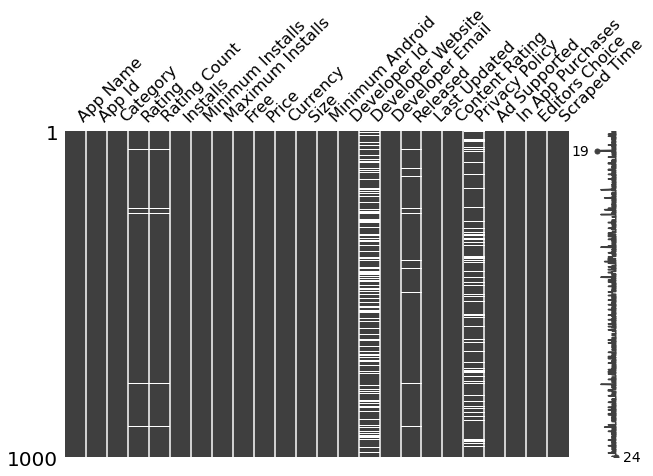

In [8]:
# Checking the comppletensss of the data using sample 
get_ipython().run_line_magic('matplotlib', 'inline')
mn.matrix(df.sample(1000), figsize=(10,6))

The plot shows using a random sample when checking the avaliblity data, we can see data for Developer website, Privacy Policy, Released date are relativel scarse than others.

<AxesSubplot:>

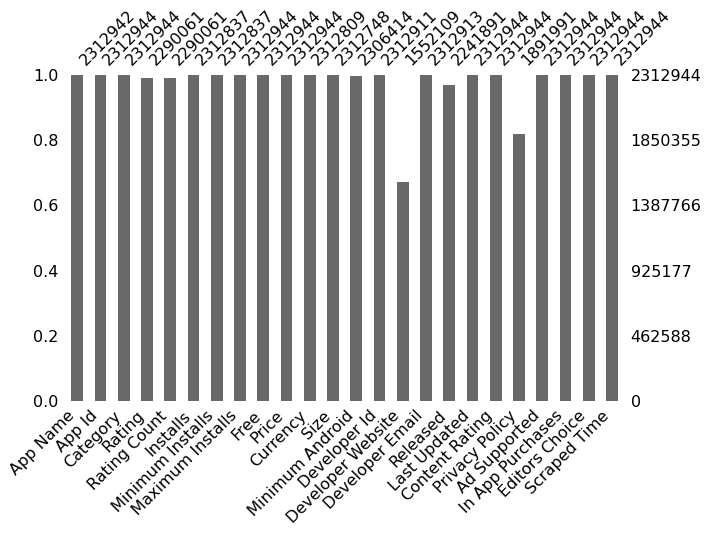

In [9]:
# Checking completness of columns with row count
mn.bar(df, figsize=(10,6))

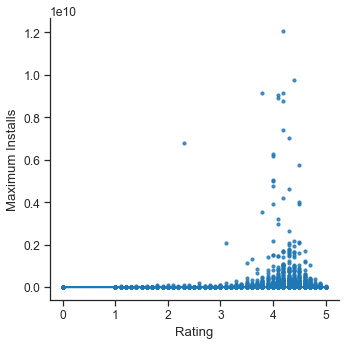

In [10]:
# Distribution of Ratings with Maximum number of Installs 
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('Rating', 'Maximum Installs',
           data=df,
           fit_reg=True,
           scatter_kws={"marker": "D",
                        "s": 10})
plt.show()

Apps with highest number of installations seems wo have high rating.

In [92]:
# Percent of Free apps 
len(df[df['Free']==True])/len(df['Free'])*100

98.05148762788896

In [83]:
# counting unique values
category_count = len(pd.unique(df['Category']))
print(category_count)

48


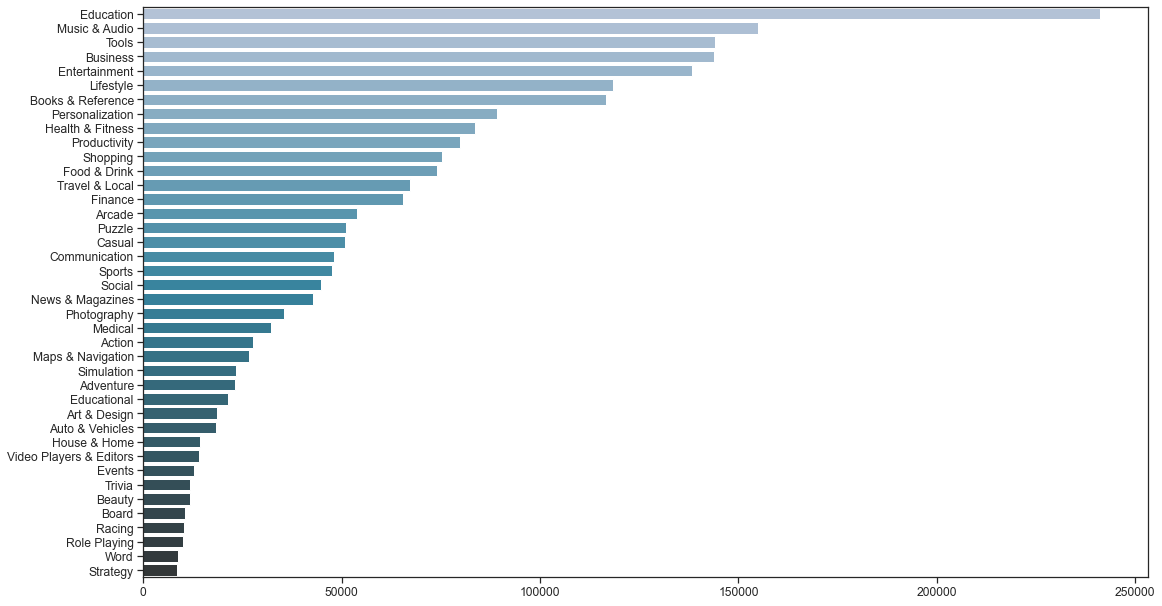

In [53]:
# Displaying number of APPs by Category
plt.figure(figsize=(18, 10.5))
genres = df['Category'].value_counts()[:40]
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")


<Figure size 2880x2880 with 0 Axes>

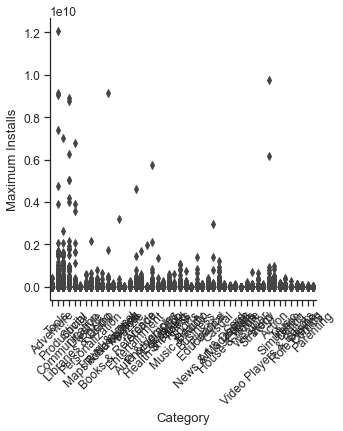

In [77]:
# Popular Apps by Category 
plt.figure(figsize=(40,40))
ax = sns.catplot
sns.factorplot(x= 'Category',y='Maximum Installs',data=df,kind='box',aspect=1)
plt.xticks(rotation=45)
plt.show()

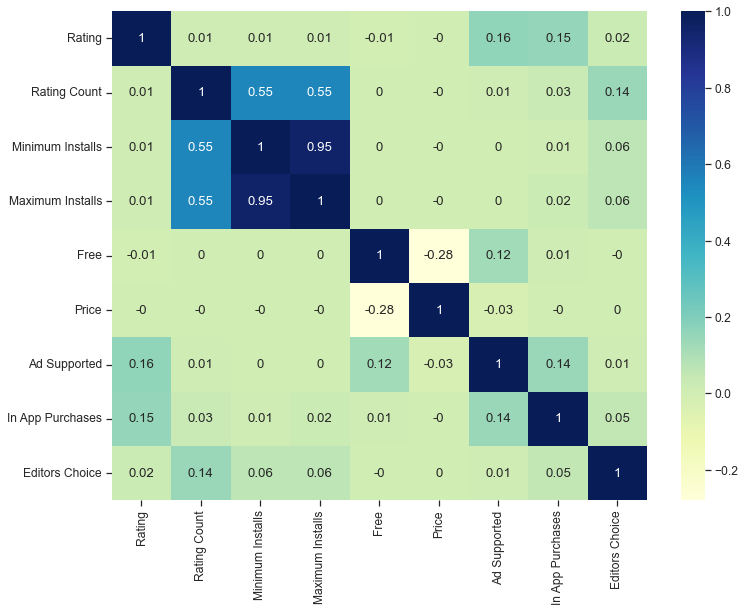

In [23]:
# Correlation between features 
plt.figure(figsize=(12, 9));
correlation_matrix = df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

### 2. Data Preparation 

In [24]:
# Getting the number of missing values 
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [25]:
# Dropping rows with missing values
df2 = df.dropna()
df2.shape

(1287191, 24)

In [27]:
# Checking Currency 
df2['Currency'].value_counts()

USD    1286647
XXX        533
EUR          4
GBP          2
INR          2
VND          1
TRY          1
ZAR          1
Name: Currency, dtype: int64

In [29]:
#Selecting Data where the currecny is USD
df3 = df2.loc[(df2['Currency'] == 'USD')]

In [31]:
# Checking the target varibale , Install
df3['Installs'].unique()

array(['10+', '5,000+', '100+', '50+', '50,000+', '10,000+', '1,000+',
       '500+', '500,000+', '100,000+', '10,000,000+', '1+', '1,000,000+',
       '5+', '5,000,000+', '100,000,000+', '0+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [32]:
#converting the installs to numeric value
df3['Installs'] = df3['Installs'].str.replace(',','')
df3['Installs'] = df3['Installs'].str.replace('+','')
df3['Installs'] = df3['Installs'].str.replace('Free','0')
df3['Installs'] = pd.to_numeric(df3['Installs'])

In [33]:
# Checking againg the install unique vlaues 
df3['Installs'].unique()

array([         10,        5000,         100,          50,       50000,
             10000,        1000,         500,      500000,      100000,
          10000000,           1,     1000000,           5,     5000000,
         100000000,           0,    50000000,  1000000000,   500000000,
        5000000000, 10000000000], dtype=int64)

To get avergae number of installation per year Install amount will be devidided by the number of APP days

In [34]:
# Getting the number of days for App at the time of data collection 
df3[['Released','Scraped Time']] = df3[['Released','Scraped Time']].apply(pd.to_datetime) # Conversting 
df3['App_days'] = (df3['Scraped Time'] - df3['Released']).dt.days

In [35]:
# Converting the number of days to Years 
df3['App_year']= round(df3['App_days']/365)

In [36]:
# Calculating average Annual Installaition amount 
df3['avr.annual.Install']= df3['Installs']/df3['App_year']

In [37]:
# Checkin top rows 
df3.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,App_days,App_year,avr.annual.Install
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,...,"Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,475,1.0,10.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,...,"May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,390,1.0,5000.0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,...,"Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,480,1.0,100.0
5,IMOCCI,com.imocci,Social,0.0,0.0,50,50.0,89,True,0.0,...,"Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,904,2.0,25.0
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000.0,62433,True,0.0,...,"Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,632,2.0,25000.0


In [38]:
# Checking the stasticc of numeric columns again 
df3.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,App_days,App_year,avr.annual.Install
count,1.286647e+06,1.286647e+06,1.286647e+06,1.286647e+06,1.286647e+06,1.286647e+06,1.286647e+06,1.286647e+06,1.285052e+06
mean,2.315790e+00,4.472551e+03,2.692382e+05,2.692382e+05,4.677921e+05,1.100181e-01,1.110835e+03,3.044136e+00,inf
std,2.090324e+00,2.595338e+05,1.834775e+07,1.834775e+07,2.781062e+07,2.438557e+00,7.963104e+02,2.203442e+00,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.150000e+02,0.000000e+00,4.850000e+02,1.000000e+00,3.333333e+01
50%,3.300000e+00,7.000000e+00,5.000000e+02,5.000000e+02,9.500000e+02,0.000000e+00,9.290000e+02,3.000000e+00,2.500000e+02
75%,4.300000e+00,6.100000e+01,1.000000e+04,1.000000e+04,1.075100e+04,0.000000e+00,1.554000e+03,4.000000e+00,3.333333e+03
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,4.157000e+03,1.100000e+01,inf


In [39]:
# Remove infinity and NAN values from avr.annual.install
# Replacing infinite with nan 
df3.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df3.dropna(inplace=True) 


In [40]:
# Running Stastical Summay
df3.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,App_days,App_year,avr.annual.Install
count,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06,1.207012e+06
mean,2.371408e+00,4.746385e+03,2.855014e+05,2.855014e+05,4.957986e+05,1.164026e-01,1.177587e+03,3.244979e+00,6.375878e+04
std,2.080166e+00,2.679432e+05,1.894266e+07,1.894266e+07,2.870991e+07,2.515762e+00,7.770414e+02,2.126912e+00,2.430112e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.830000e+02,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.340000e+02,0.000000e+00,5.620000e+02,2.000000e+00,2.500000e+01
50%,3.400000e+00,8.000000e+00,1.000000e+03,1.000000e+03,1.084000e+03,0.000000e+00,9.920000e+02,3.000000e+00,2.500000e+02
75%,4.300000e+00,6.700000e+01,1.000000e+04,1.000000e+04,1.210500e+04,0.000000e+00,1.605000e+03,4.000000e+00,2.500000e+03
max,5.000000e+00,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,4.157000e+03,1.100000e+01,1.111111e+09


In [41]:
# Selecting features to be used in the modeling
# List of current columns 
df3.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'App_days', 'App_year', 'avr.annual.Install'],
      dtype='object')

The following columns were chosen to be included in the model 

In [96]:
df4= df3.loc[:, ['Category', 'Rating', 'Rating Count','Free',
                 'Price','Currency','Minimum Android',
                 'Content Rating','Ad Supported','In App Purchases',
                 'Editors Choice','avr.annual.Install']] 

In [97]:
# Check top rows
df4.head()

,Category,Rating,Rating Count,Free,Price,Currency,Minimum Android,Content Rating,Ad Supported,In App Purchases,Editors Choice,avr.annual.Install
0,Adventure,0.0,0.0,True,0.0,USD,7.1 and up,Everyone,False,False,False,10.0
1,Tools,4.4,64.0,True,0.0,USD,5.0 and up,Everyone,True,False,False,5000.0
4,Tools,0.0,0.0,True,0.0,USD,4.1 and up,Everyone,False,False,False,100.0
5,Social,0.0,0.0,True,0.0,USD,6.0 and up,Teen,False,True,False,25.0
9,Personalization,4.7,820.0,True,0.0,USD,4.1 and up,Everyone,True,False,False,25000.0


In [98]:
# Checking data types 
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207012 entries, 0 to 2312942
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Category            1207012 non-null  object 
 1   Rating              1207012 non-null  float64
 2   Rating Count        1207012 non-null  float64
 3   Free                1207012 non-null  bool   
 4   Price               1207012 non-null  float64
 5   Currency            1207012 non-null  object 
 6   Minimum Android     1207012 non-null  object 
 7   Content Rating      1207012 non-null  object 
 8   Ad Supported        1207012 non-null  bool   
 9   In App Purchases    1207012 non-null  bool   
 10  Editors Choice      1207012 non-null  bool   
 11  avr.annual.Install  1207012 non-null  float64
dtypes: bool(4), float64(4), object(4)
memory usage: 87.5+ MB


In [99]:
# Converting categorical vlaues to numerical
    
df4 = pd.get_dummies(df4, columns= ['Category','Free','Currency',
                                    'Minimum Android','Content Rating',
                                    'Ad Supported','In App Purchases','Editors Choice'])

In [100]:
# Checking top Rows
df4.head()

,Rating,Rating Count,Price,avr.annual.Install,Category_Action,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,...,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Ad Supported_False,Ad Supported_True,In App Purchases_False,In App Purchases_True,Editors Choice_False,Editors Choice_True
0,0.0,0.0,0.0,10.0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,4.4,64.0,0.0,5000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0.0,0.0,0.0,100.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5,0.0,0.0,0.0,25.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
9,4.7,820.0,0.0,25000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [101]:
df4.shape

(1207012, 173)

### 3. Model Preparation and Evaluation 

In [102]:
#Train Test Split 
# Assigining target and features 
Y=df4['avr.annual.Install']
X=df4.drop(['avr.annual.Install'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [103]:
#Checking Size
print("Train Size: " + str(X_train.shape))
print("Test Size: " + str(X_test.shape))


Train Size: (965609, 172)
Test Size: (241403, 172)


##### Model 1 GaradientBoosting Regressor

In [104]:
# Get library
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor()
# Initializing the model and fitting the model with train data
GBoost.fit(X_train, Y_train)

GradientBoostingRegressor()

In [105]:
# Generating predictions over test data 
Y_predict = GBoost.predict(X_test)

#### Model 1 Evaluation 

In [106]:
# Get regession Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluating the model using MAE Evaluation Metric
print("R2: " + str(r2_score(Y_test, Y_predict)))
print("MAE: " + str(mean_absolute_error(Y_test, Y_predict)))
print("MSE: " + str(mean_squared_error(Y_test, Y_predict)))
print("rmse: " + str(mean_squared_error(Y_test, Y_predict, squared=False)))

R2: 0.23397332828422068
MAE: 61924.50667132769
MSE: 3144261357651.3022
rmse: 1773206.518612906


#### Model 2 DecisionTree Regressor

In [107]:
# Importing Library
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_leaf_nodes=29, random_state=0)
Dtree.fit(X_train, Y_train)

DecisionTreeRegressor(max_leaf_nodes=29, random_state=0)

In [108]:
# Generating predictions over test data 
Y_predict_dt = Dtree.predict(X_test)

In [109]:
# Evaluation
print("MAE_Dt: " + str(r2_score(Y_test, Y_predict_dt)))
print("MAE_Dt: " + str(mean_absolute_error(Y_test, Y_predict_dt)))


MAE_Dt: 0.24335799323716045
MAE_Dt: 72326.86903799174


###  Conclusion 

In [111]:
# Getting the MAE for the three models
print(" Model1_GradientBoostingRegressor_ MAE: " + str(mean_absolute_error(Y_test, Y_predict)))
print("Model2 _DecisionTreeRegressor_MAE: " + str(mean_absolute_error(Y_test, Y_predict_dt)))


 Model1_GradientBoostingRegressor_ MAE: 61924.50667132769
Model2 _DecisionTreeRegressor_MAE: 72326.86903799174


Based on the Mean Absolute error from the two evlauated models Gradient Boosing Regressor has a better performance.